Loading BokehJS ...

C:\Users\andrey\Anaconda3\lib\site-packages\bokeh\plotting\graph.py:120: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


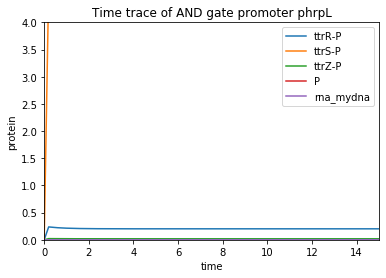

In [1]:
from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
import pandas as pd
try:
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook()
    plotCRN = True
except ModuleNotFoundError:
    plotCRN = False


%matplotlib inline
parameters = {
    ('phrpL_hrpR', 'cooperativity'): 1.0, #default is 2, but these proteins bind at cooperativity = 1
    ('phrpL_hrpS', 'cooperativity'): 1.0, 
    ('phrpL_hrpR_hrpS_RNAP', 'ktx'): 0.17025,  #this is the transcription rate
    ('phrpL_hrpR_hrpS_RNAP', 'ku'): 11.01321586, #this is the polymerase unbinding rate

    ('translation_mm', 'B0030', 'ku'): 10.0, #Unbinding
    ('translation_mm', 'B0030', 'ktl'): 1.5, #Translation Rate

    ('transcription_mm',  'ktx'): .01,    #These are the parameters for transcription leak
    ('transcription_mm', 'ku'): 100,
    ('ttrR-P',"kdephos"):1000,
    ('ttrS-P',"kdephos"):1000,
    ('ttrS-P',"kphos"):10,
    ('ttrZ-P',"kdephos"):9000,
    ('ttrR-ttrZ','ktransfer'):90,
    ('ttrS-ttrR','ktransfer'):10,
    ('ttrZ-ttrR','ktransfer'):90,
    "kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2 #some default parameters
}


x = PhosphoTransferase("ttrR",targets=["ttrZ"])
y = PhosphoTransferase("ttrS",targets= ["ttrR"])
z = PhosphoTransferase("ttrZ",targets=["ttrR"])
p = Species("P",material_type="phosphate")
#txtl = CRNLab("GFP")
#txtl.mixture("mixture1", extract = "TxTlExtract", mixture_volume = 1e-6, mixture_parameters = 'BasicExtract.tsv')
dna = DNAassembly("mydna",promoter=RegulatedPromoter("pttr",[x.get_phosphorylated_species()],leak=False),rbs="UTR1",protein="GFP")


extract_1_TXTL = TxTlExtract(name = "e coli extract 1", components = [dna,x,y,z], \
                                     parameters=parameters, parameter_file = "Default Param File Example.tsv")
#Print the CRN
myCRN = extract_1_TXTL.compile_crn()


plotCRN = True
if(plotCRN):
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,useweights=False)
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500))
    graphPlot(DG,DGspec,DGrxn,plot)
    bokeh.io.show(plot)

timepoints = np.linspace(0, 200, 1000)
x0 = {"dna_mydna":5.0, "protein_ttrS":10, "protein_ttrR":10, "phosphate_P":100.,"protein_RNAP":10, "protein_ttrZ":10,"protein_Ribo":50.,}
Re1 = myCRN.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
plt.plot(timepoints,Re1["complex_phosphate_P_protein_ttrR"], label = "ttrR-P")
plt.plot(timepoints,Re1["complex_phosphate_P_protein_ttrS"], label = "ttrS-P")
plt.plot(timepoints,Re1["complex_phosphate_P_protein_ttrZ"], label = "ttrZ-P")
plt.plot(timepoints,Re1["phosphate_P"], label = "P")
#plt.plot(timepoints,Re1["protein_GFP"], label = "GFP")
plt.plot(timepoints,Re1["rna_mydna"], label = "rna_mydna")
#plt.gca().set_yscale("log")
plt.title("Time trace of AND gate promoter phrpL")
plt.xlabel("time")
plt.ylabel("protein")
plt.ylim(0,4)
plt.xlim(0,15)
plt.legend()
plt.show()






C:\Users\andrey\Anaconda3\lib\site-packages\holoviews\core\data\grid.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, defaultdict, Iterable


ImportError: None of the backends could be imported